<a href="https://colab.research.google.com/github/Poohi5/cmpe258_homework/blob/master/Ungradedassignment5/Ungradedassignment5_Tensorflow_Keras_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Basic classification: Classify images of clothing

 tf.keras, a high-level API to build and train models in TensorFlow.

Import Packages/Libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc3


Load Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Explore Data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_labels.shape

(10000,)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [8]:
train_labels.shape

(60000,)

Normalizing Data

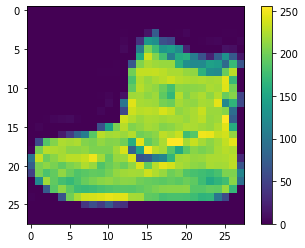

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

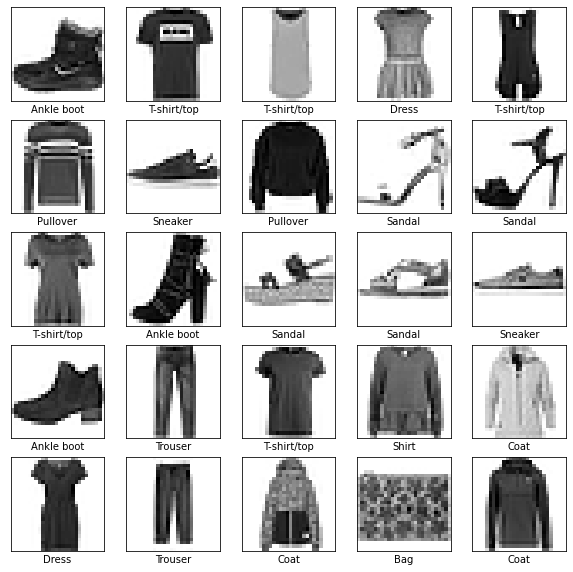

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Build Model

Set up layers using tf.keras.layers.Dense

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Compile Model

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4943 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3706 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3360 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3122 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2805 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2679 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2570 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2485 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.237

Performance i.e Accuracy evaluation

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3540 - accuracy: 0.8782

Test accuracy: 0.8781999945640564


Prediction

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([7.6193680e-07, 5.4874466e-10, 3.4272333e-08, 6.6169964e-12,
       3.3099422e-08, 1.0415521e-03, 6.4201267e-06, 1.9822372e-02,
       2.0775121e-07, 9.7912860e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify Prediction

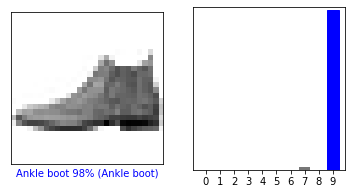

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

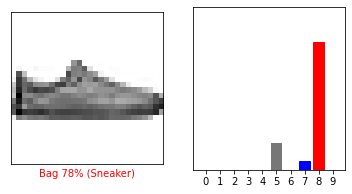

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

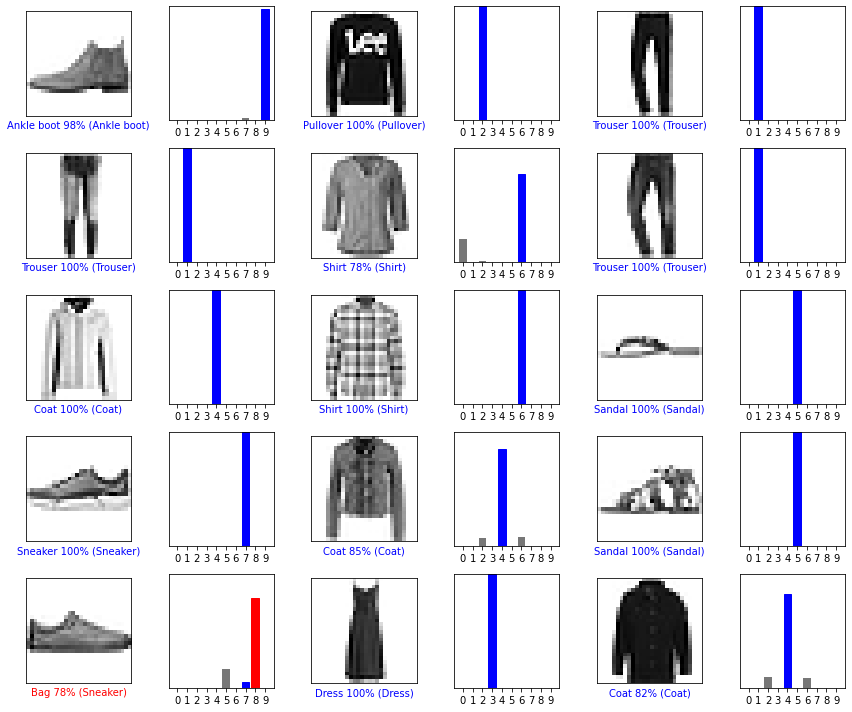

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.1866698e-06 1.5667288e-15 9.9917251e-01 1.3525460e-11 6.2028965e-04
  1.6991485e-10 2.0600171e-04 1.6750610e-16 3.9268046e-12 3.3188006e-16]]


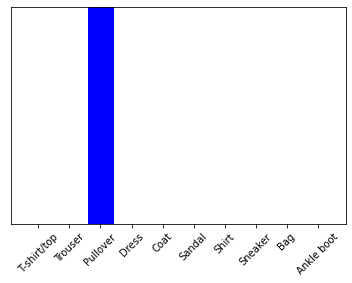

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
np.argmax(predictions_single[0])

2

##Text classification with TensorFlow Hub: Movie reviews

In [30]:
!pip install -q tensorflow-hub
!pip install -q tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

     |████████████████████████████████| 3.3MB 3.4MB/s 
Version:  2.2.0-rc3
Eager mode:  True
Hub version:  0.8.0
GPU is NOT AVAILABLE


In [31]:
# Split the training set into 60% and 40%, so we'll end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteB7E0U8/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteB7E0U8/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteB7E0U8/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [32]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [33]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

Build the model

In [34]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [35]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


Loss function and optimizer

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [37]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 3s 107ms/step - loss: 0.9331 - accuracy: 0.5117 - val_loss: 0.6734 - val_accuracy: 0.5380
Epoch 2/20
30/30 [==============================] - 3s 104ms/step - loss: 0.6586 - accuracy: 0.5380 - val_loss: 0.6349 - val_accuracy: 0.5719
Epoch 3/20
30/30 [==============================] - 3s 104ms/step - loss: 0.6155 - accuracy: 0.5996 - val_loss: 0.6019 - val_accuracy: 0.6144
Epoch 4/20
30/30 [==============================] - 3s 108ms/step - loss: 0.5824 - accuracy: 0.6499 - val_loss: 0.5746 - val_accuracy: 0.6564
Epoch 5/20
30/30 [==============================] - 3s 105ms/step - loss: 0.5510 - accuracy: 0.6889 - val_loss: 0.5486 - val_accuracy: 0.6929
Epoch 6/20
30/30 [==============================] - 3s 103ms/step - loss: 0.5224 - accuracy: 0.7164 - val_loss: 0.5230 - val_accuracy: 0.7248
Epoch 7/20
30/30 [==============================] - 3s 108ms/step - loss: 0.4918 - accuracy: 0.7501 - val_loss: 0.4961 - val_accuracy: 0.7498
Epoch 

Evaluate

In [38]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 3s - loss: 0.3176 - accuracy: 0.8593
loss: 0.318
accuracy: 0.859


Text classification with preprocessed text: Movie reviews

In [39]:
(train_data, test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete4APDBE/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete4APDBE/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete4APDBE/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


Encoding

In [0]:
encoder = info.features['text'].encoder

In [41]:
print ('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [42]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print ('The original string: "{}"'.format(original_string))

assert original_string == sample_string

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [43]:
for ts in encoded_string:
  print ('{} ----> {}'.format(ts, encoder.decode([ts])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


Explore the data

In [44]:
for train_example, train_label in train_data.take(1):
  print('Encoded text:', train_example[:10].numpy())
  print('Label:', train_label.numpy())

Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0


In [45]:
encoder.decode(train_example)

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

Prepare the data for training

In [0]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, padded_shapes=([None],[])))

test_batches = (
    test_data
    .padded_batch(32, padded_shapes=([None],[])))

In [0]:
train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32))

test_batches = (
    test_data
    .padded_batch(32))

In [48]:
for example_batch, label_batch in train_batches.take(2):
  print("Batch shape:", example_batch.shape)
  print("label shape:", label_batch.shape)
  

Batch shape: (32, 875)
label shape: (32,)
Batch shape: (32, 1357)
label shape: (32,)


Build the model

In [49]:
model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1)])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


Loss function and optimizer

In [0]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train model

In [51]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6823 - accuracy: 0.5003 - val_loss: 0.6645 - val_accuracy: 0.5042
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6213 - accuracy: 0.5508 - val_loss: 0.5948 - val_accuracy: 0.5781
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5403 - accuracy: 0.6664 - val_loss: 0.5314 - val_accuracy: 0.7135
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.4747 - accuracy: 0.7496 - val_loss: 0.4823 - val_accuracy: 0.7854
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.4201 - accuracy: 0.8050 - val_loss: 0.4440 - val_accuracy: 0.7917
Epoch 6/10
782/782 [==============================] - 8s 11ms/step - loss: 0.3798 - accuracy: 0.8337 - val_loss: 0.4168 - val_accuracy: 0.8208
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3492 - accuracy: 0.8543 - val_loss: 0.3961 - val_accuracy: 0.8427

Evaluate the model

In [52]:
loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.3322 - accuracy: 0.8665
Loss:  0.33222696185112
Accuracy:  0.8665199875831604


Create a graph of accuracy and loss over time

In [53]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

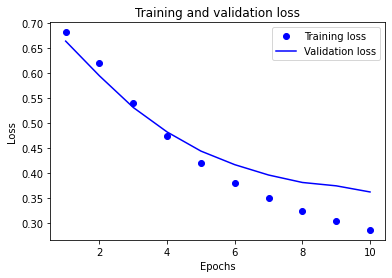

In [54]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

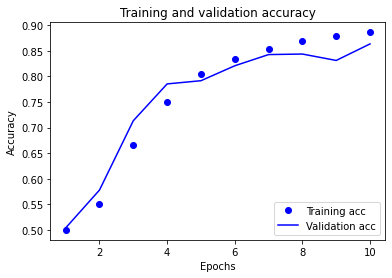

In [55]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

##Basic regression: Predict Credit Risk


In [56]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [57]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [58]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0-rc3


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

##German Dataset

In [60]:
dataset_path = keras.utils.get_file("german.data-numeric", "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric")
dataset_path

106496/102000 [===============================] - 0s 1us/step


'/root/.keras/datasets/german.data-numeric'

In [0]:
column_names = [
'checking_account',
'duration',
'credit_history',
'credit_amount',
'saving_account',
'present_emp_since',
'personal_status',
'residence_since',
'property',
'age',
'inst_plans',
'num_credits',
'dependents',
'telephone',
'foreign_worker',
'new_car',
'used_car',
'Debtors_None',
'Debtors_CoApplicant',
'Rent_hose',
'Own_Hose',
'Unemployed_And_Unskilled_Non_res',
'Unskilled_resident',
'skilled_official',
'status'
]
raw_dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric',delim_whitespace=True,header=None)
raw_dataset.columns=column_names
dataset = raw_dataset.copy()


In [62]:
dataset.head()

,checking_account,duration,credit_history,credit_amount,saving_account,present_emp_since,personal_status,residence_since,property,age,inst_plans,num_credits,dependents,telephone,foreign_worker,new_car,used_car,Debtors_None,Debtors_CoApplicant,Rent_hose,Own_Hose,Unemployed_And_Unskilled_Non_res,Unskilled_resident,skilled_official,status
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2


In [63]:
dataset.tail()

,checking_account,duration,credit_history,credit_amount,saving_account,present_emp_since,personal_status,residence_since,property,age,inst_plans,num_credits,dependents,telephone,foreign_worker,new_car,used_car,Debtors_None,Debtors_CoApplicant,Rent_hose,Own_Hose,Unemployed_And_Unskilled_Non_res,Unskilled_resident,skilled_official,status
995,4,12,2,17,1,4,2,4,1,31,3,1,1,1,1,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,3,1,1,2,1,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,3,1,1,1,1,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,3,1,1,2,1,0,0,1,0,0,0,0,0,1,2
999,2,45,4,46,2,1,3,4,3,27,3,1,1,1,1,0,1,1,0,0,1,0,0,1,1


##Preprocessing

Check null values

In [64]:
dataset.isna().sum()

checking_account                    0
duration                            0
credit_history                      0
credit_amount                       0
saving_account                      0
present_emp_since                   0
personal_status                     0
residence_since                     0
property                            0
age                                 0
inst_plans                          0
num_credits                         0
dependents                          0
telephone                           0
foreign_worker                      0
new_car                             0
used_car                            0
Debtors_None                        0
Debtors_CoApplicant                 0
Rent_hose                           0
Own_Hose                            0
Unemployed_And_Unskilled_Non_res    0
Unskilled_resident                  0
skilled_official                    0
status                              0
dtype: int64

In [0]:
dataset = dataset.dropna()

Train Test Split

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

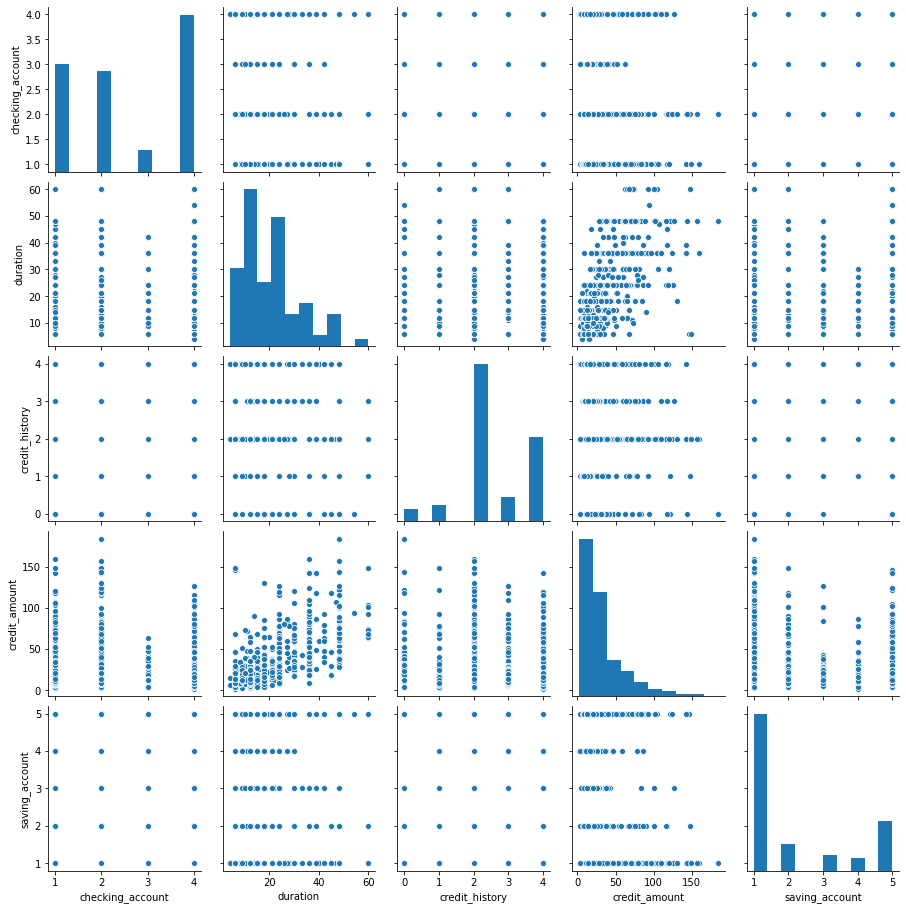

In [67]:
sns.pairplot(train_dataset[['checking_account',
'duration',
'credit_history',
'credit_amount',
'saving_account']])

In [68]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
checking_account,800.0,2.59125,1.269326,1.0,1.0,2.0,4.0,4.0
duration,800.0,21.01250,11.927916,4.0,12.0,18.0,24.0,60.0
credit_history,800.0,2.52000,1.090223,0.0,2.0,2.0,4.0,4.0
credit_amount,800.0,32.15250,27.722417,2.0,14.0,23.0,39.0,184.0
saving_account,800.0,2.12625,1.596401,1.0,1.0,1.0,3.0,5.0
present_emp_since,800.0,3.37000,1.215503,1.0,3.0,3.0,5.0,5.0
personal_status,800.0,2.69125,0.706433,1.0,2.0,3.0,3.0,4.0
residence_since,800.0,2.83375,1.109121,1.0,2.0,3.0,4.0,4.0
property,800.0,2.38000,1.046168,1.0,1.0,2.0,3.0,4.0
age,800.0,35.36500,11.104657,19.0,27.0,33.0,42.0,75.0


Split features from labels

In [0]:
train_labels = train_dataset.pop('status')
test_labels = test_dataset.pop('status')

Normalization

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [71]:
normed_train_data.shape

(800, 25)

In [72]:
normed_test_data.shape

(200, 25)

Build Model

In [73]:
len(train_dataset.keys())

24

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1600      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 5,825
Trainable params: 5,825
Non-trainable params: 0
_________________________________________________________________


Predict

In [77]:
normed_train_data.pop('status')

993   NaN
859   NaN
298   NaN
553   NaN
672   NaN
       ..
117   NaN
464   NaN
25    NaN
110   NaN
149   NaN
Name: status, Length: 800, dtype: float64

In [78]:
normed_test_data.pop('status')

9     NaN
11    NaN
19    NaN
23    NaN
28    NaN
       ..
962   NaN
966   NaN
976   NaN
980   NaN
983   NaN
Name: status, Length: 200, dtype: float64

In [79]:
normed_train_data[:10]

,Debtors_CoApplicant,Debtors_None,Own_Hose,Rent_hose,Unemployed_And_Unskilled_Non_res,Unskilled_resident,age,checking_account,credit_amount,credit_history,dependents,duration,foreign_worker,inst_plans,new_car,num_credits,personal_status,present_emp_since,property,residence_since,saving_account,skilled_official,telephone,used_car
993,-0.213763,0.330807,0.642581,-0.470210,-0.147256,-0.507483,-0.483131,-1.253618,0.283074,-0.476967,-0.425977,1.256506,-0.183166,0.474166,-0.546194,-0.693795,0.437055,-1.949811,-0.363230,0.149894,-0.705493,-1.300571,1.192670,-0.328479
859,-0.213763,-3.019135,-1.554278,2.124052,-0.147256,-0.507483,-0.843340,1.109841,0.138787,-0.476967,2.344608,-1.007091,5.452708,0.474166,1.828563,-0.693795,0.437055,-0.304401,-1.319099,-0.751722,-0.079084,0.767932,-0.837407,-0.328479
298,-0.213763,0.330807,0.642581,-0.470210,-0.147256,-0.507483,0.687549,1.109841,-0.258004,-0.476967,-0.425977,-0.252559,-0.183166,0.474166,-0.546194,-0.693795,0.437055,-0.304401,-1.319099,1.051509,-0.705493,0.767932,1.192670,-0.328479
553,-0.213763,0.330807,0.642581,-0.470210,-0.147256,-0.507483,-0.753288,-0.465799,-0.438364,1.357521,-0.425977,-0.755580,-0.183166,0.474166,1.828563,-0.693795,0.437055,-1.127106,0.592639,-1.653337,-0.079084,0.767932,-0.837407,-0.328479
672,-0.213763,0.330807,0.642581,-0.470210,-0.147256,-0.507483,0.597497,1.109841,2.591675,-0.476967,-0.425977,3.268593,-0.183166,0.474166,1.828563,-0.693795,0.437055,1.341009,-0.363230,1.051509,-0.705493,-1.300571,1.192670,-0.328479
971,-0.213763,0.330807,0.642581,-0.470210,-0.147256,1.968045,0.687549,1.109841,1.509518,-0.476967,2.344608,0.250463,-0.183166,0.474166,1.828563,-0.693795,0.437055,-0.304401,-0.363230,1.051509,-0.705493,-1.300571,-0.837407,-0.328479
27,-0.213763,0.330807,-1.554278,2.124052,-0.147256,-0.507483,0.597497,0.322021,-1.015514,-1.394210,-0.425977,-0.755580,-0.183166,0.474166,-0.546194,1.024582,-0.978508,-0.304401,-1.319099,0.149894,1.173734,0.767932,-0.837407,-0.328479
231,-0.213763,0.330807,-1.554278,-0.470210,-0.147256,1.968045,1.407968,1.109841,-0.258004,-0.476967,-0.425977,-1.007091,-0.183166,0.474166,1.828563,-0.693795,0.437055,1.341009,1.548508,1.051509,0.547325,-1.300571,-0.837407,-0.328479
306,-0.213763,0.330807,-1.554278,2.124052,-0.147256,1.968045,-1.023444,1.109841,0.571649,-0.476967,-0.425977,0.753484,-0.183166,-0.915332,-0.546194,-0.693795,-0.978508,0.518304,-0.363230,1.051509,1.800143,-1.300571,-0.837407,3.040533
706,-0.213763,0.330807,0.642581,-0.470210,-0.147256,-0.507483,-1.023444,-0.465799,1.220943,-0.476967,-0.425977,2.262549,-0.183166,0.474166,1.828563,-0.693795,0.437055,0.518304,-0.363230,-0.751722,-0.079084,0.767932,-0.837407,-0.328479


In [80]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.01182102],
       [-0.61681575],
       [-0.12821499],
       [-0.05495137],
       [ 0.01215774],
       [-0.2729012 ],
       [-0.5814575 ],
       [-0.13770929],
       [-0.7076072 ],
       [-0.11077601]], dtype=float32)

Train Model

In [81]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.6191,  mae:0.5982,  mse:0.6191,  val_loss:0.2618,  val_mae:0.4102,  val_mse:0.2618,  
....................................................................................................
Epoch: 100, loss:0.0126,  mae:0.0854,  mse:0.0126,  val_loss:0.2484,  val_mae:0.3745,  val_mse:0.2484,  
....................................................................................................
Epoch: 200, loss:0.0082,  mae:0.0734,  mse:0.0082,  val_loss:0.2492,  val_mae:0.3731,  val_mse:0.2492,  
....................................................................................................
Epoch: 300, loss:0.0057,  mae:0.0618,  mse:0.0057,  val_loss:0.2432,  val_mae:0.3619,  val_mse:0.2432,  
....................................................................................................
Epoch: 400, loss:0.0033,  mae:0.0446,  mse:0.0033,  val_loss:0.2245,  val_mae:0.3505,  val_mse:0.2245,  
........................................................................

Visualize Model's training process

In [82]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.001677,0.032490,0.001677,0.206063,0.340752,0.206063,995
996,0.001638,0.031918,0.001638,0.207200,0.337911,0.207200,996
997,0.001470,0.029782,0.001470,0.204145,0.337847,0.204145,997
998,0.001954,0.034527,0.001954,0.208664,0.342073,0.208664,998
999,0.001538,0.030332,0.001538,0.205257,0.337206,0.205257,999


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

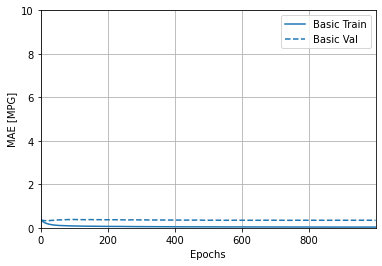

In [84]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

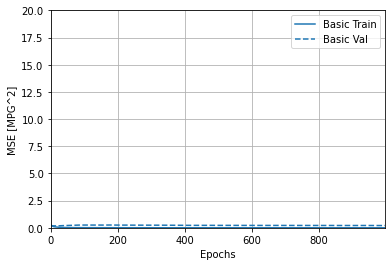

In [85]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [86]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.7904,  mae:0.6738,  mse:0.7904,  val_loss:0.3394,  val_mae:0.4574,  val_mse:0.3394,  
..................

Text(0, 0.5, 'MAE [MPG]')

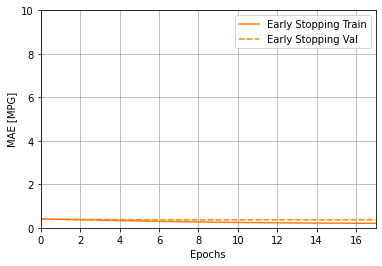

In [87]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [88]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

7/7 - 0s - loss: 0.2198 - mae: 0.3866 - mse: 0.2161
Testing set Mean Abs Error:  0.39 MPG


Predictions after Early Stopping

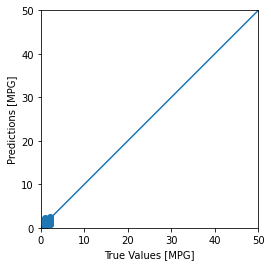

In [89]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


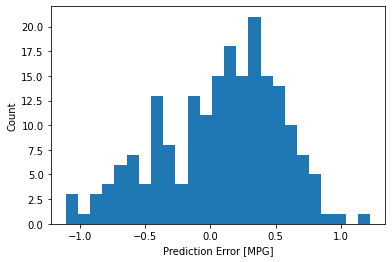

In [90]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

##Overfit and underfit

In [0]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [92]:
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [0]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile


In [0]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

The Higgs Dataset

In [95]:
gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz')

2816409600/2816407858 [==============================] - 35s 0us/step


In [0]:
FEATURES = 28

In [0]:
ds = tf.data.experimental.CsvDataset(gz,[float(),]*(FEATURES+1), compression_type="GZIP")

In [0]:
def pack_row(*row):
  label = row[0]
  features = tf.stack(row[1:],1)
  return features, label

In [0]:
packed_ds = ds.batch(10000).map(pack_row).unbatch()

tf.Tensor(
[ 0.8692932  -0.6350818   0.22569026  0.32747006 -0.6899932   0.75420225
 -0.24857314 -1.0920639   0.          1.3749921  -0.6536742   0.9303491
  1.1074361   1.1389043  -1.5781983  -1.0469854   0.          0.65792954
 -0.01045457 -0.04576717  3.1019614   1.35376     0.9795631   0.97807616
  0.92000484  0.72165745  0.98875093  0.87667835], shape=(28,), dtype=float32)


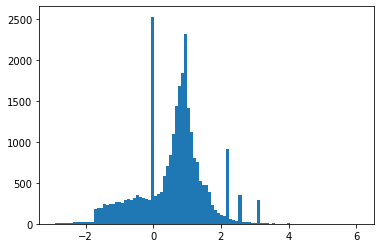

In [100]:
for features,label in packed_ds.batch(1000).take(1):
  print(features[0])
  plt.hist(features.numpy().flatten(), bins = 101)

In [0]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

In [0]:
validate_ds = packed_ds.take(N_VALIDATION).cache()
train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()

In [103]:
train_ds

<CacheDataset shapes: ((28,), ()), types: (tf.float32, tf.float32)>

In [0]:
validate_ds = validate_ds.batch(BATCH_SIZE)
train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)

Demonstrate overfitting

In [0]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

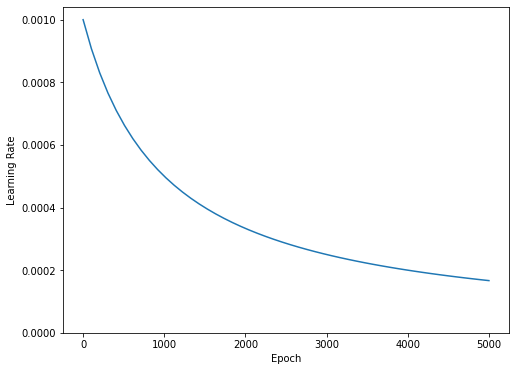

In [106]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')


In [0]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [0]:
def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

  model.summary()

  history = model.fit(
    train_ds,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_data=validate_ds,
    callbacks=get_callbacks(name),
    verbose=0)
  return history

Tiny Model

In [0]:
tiny_model = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(1)
])

In [0]:
size_histories = {}

In [111]:
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4871,  binary_crossentropy:0.8491,  loss:0.8491,  val_accuracy:0.4880,  val_binary_crossentropy:0.8002,  val_loss:0.8002,  
....................................................................................................
Epoch: 100, accuracy:0.5921,  binary_crossentropy:0.6292,  loss:0.6292,  val_accuracy:0.5590,  val_binary_crossentropy:0.6352,  val_loss:0.6352,  
....................................................................................................
Epoch: 200, accuracy:0.

(0.5, 0.7)

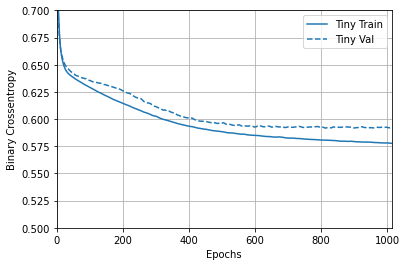

In [112]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])

Small Model


In [0]:
small_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(16, activation='elu'),
    layers.Dense(1)
])

In [114]:
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4936,  binary_crossentropy:0.7706,  loss:0.7706,  val_accuracy:0.5220,  val_binary_crossentropy:0.7100,  val_loss:0.7100,  
....................................................................................................
Epoch: 100, accuracy:0.6108,  binary_crossentropy:0.6164,  loss:0.6164,  val_accuracy:0.5960,  val_binary_crossentropy:0.6229,  val_loss:0.

Medium Model

In [0]:
medium_model = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(1)
])

In [116]:
size_histories['Medium']  = compile_and_fit(medium_model, "sizes/Medium")

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                1856      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.5059,  binary_crossentropy:0.6908,  loss:0.6908,  val_accuracy:0.4910,  val_binary_crossentropy:0.6816,  val_loss:0.6816,  
....................................................................................................
E

Large Model

In [0]:
large_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(1)
])

In [118]:
size_histories['large'] = compile_and_fit(large_model, "sizes/large")

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.5141,  binary_crossentropy:0.8103,  loss:0.8103,  val_accuracy:0.4720,  val_binary_crossentr

Plotting the Training and Testing losses

Text(0.5, 0, 'Epochs [Log Scale]')

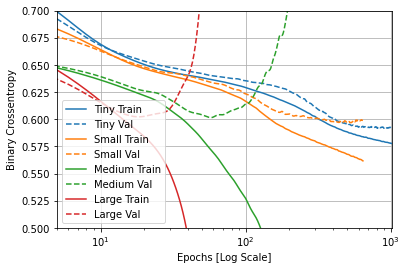

In [119]:
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.5, 0.7])
plt.xlabel("Epochs [Log Scale]")

Steps to prevent overfitting

In [122]:
shutil.rmtree(logdir/'regularizers/Tiny', ignore_errors=True)
shutil.copytree(logdir/'sizes/Tiny', logdir/'regularizers/Tiny')

PosixPath('/tmp/tmpnm7n6rje/tensorboard_logs/regularizers/Tiny')

In [0]:
regularizer_histories = {}
regularizer_histories['Tiny'] = size_histories['Tiny']

Add weight regularization

In [124]:
l2_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2")

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.5147,  binary_crossentropy:0.7603,  loss:2.2502,  val_accuracy:0.4990,  val_binary_crossent

(0.5, 0.7)

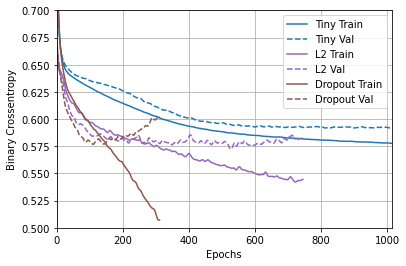

In [126]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

Add dropout

In [125]:
dropout_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

regularizer_histories['dropout'] = compile_and_fit(dropout_model, "regularizers/dropout")

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)             

(0.5, 0.7)

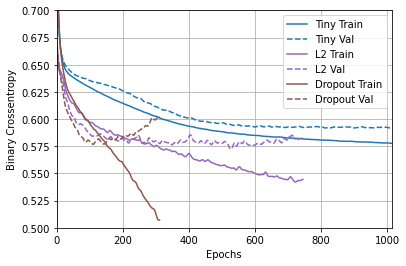

In [127]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

Combined L2 + dropout

In [128]:
combined_model = tf.keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

regularizer_histories['combined'] = compile_and_fit(combined_model, "regularizers/combined")

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)             